In [1]:
import pandas as pd #the csv reading library
import matplotlib as mpl
import matplotlib.pyplot as plt #the ploting library
import glob #to get file names
import numpy as np
from pandas import Series
import seaborn as sns
from matplotlib.pyplot import figure
import cmocean.cm as cmo
import seaborn as sns

In [2]:
df_meta = pd.read_csv('../Dissertation_projects/Data/meta_data.csv', sep=',', index_col=0)

#fix date time 
df_meta['date_time'] = pd.to_datetime(df_meta['Date'])
df_meta['Date'] = df_meta['date_time'].dt.date

df_meta

Date     Trip Station  Lat  Lon  Water_depth Sample_depth  \
Sample                                                                    
214371  2021-10-25  GOM21FA   St.5B  NaN  NaN          NaN          NaN   
214671  2021-10-27  GOM21FA   St.MK  NaN  NaN          NaN            2   
214672  2021-10-27  GOM21FA   St.MK  NaN  NaN          NaN            4   
214673  2021-10-27  GOM21FA   St.MK  NaN  NaN          NaN            6   
214674  2021-10-27  GOM21FA   St.MK  NaN  NaN          NaN            8   
...            ...      ...     ...  ...  ...          ...          ...   
225354  2022-07-24  GOM22SU   St.MK  NaN  NaN          NaN          NA    
225355  2022-07-24  GOM22SU   St.MK  NaN  NaN          NaN          NA    
225356  2022-07-24  GOM22SU   St.MK  NaN  NaN          NaN          NA    
225357  2022-07-24  GOM22SU   St.MK  NaN  NaN          NaN          NA    
225358  2022-07-24  GOM22SU   St.MK  NaN  NaN          NaN          NA    

       Sample_depth_units  Wavguide_Path_lengths    BC_time  \
Sample                                                        
214371                 CM                  0.010        NaN   
214671                 CM                  0.010        NaN   
214672                 CM                  0.010        NaN   
214673                 CM                  0.010        NaN   
214674                 CM                  0.010        NaN   
...                   ...                    ...        ...   
225354                  M                  0.489  10.166667   
225355                  M                  0.489  10.933333   
225356                  M                  0.489  11.700000   
225357                  M                  0.489  12.466667   
225358                  M                  0.489  13.233333   

        BC_Chamber_vol_(L)     Type Waveguide_used Notes Flagged   Salinity  \
Sample                                                                        
214371                 NaN      RHZ        1CM CUV   NaN     NaN  31.846576   
214671                 NaN      RHZ        1CM CUV   NaN     NaN  31.447235   
214672                 NaN      RHZ        1CM CUV   NaN     NaN  31.447235   
214673                 NaN      RHZ        1CM CUV   NaN     NaN  31.447235   
214674                 NaN      RHZ        1CM CUV   NaN     NaN  31.447235   
...                    ...      ...            ...   ...     ...        ...   
225354            0.053721  LANDSYR  LWCC 50 CM #2  BC14     NaN  36.007597   
225355            0.053721  LANDSYR  LWCC 50 CM #2  BC15     NaN  36.007597   
225356            0.053721  LANDSYR  LWCC 50 CM #2  BC16     NaN  36.007597   
225357            0.053721  LANDSYR  LWCC 50 CM #2  BC17     NaN  36.007597   
225358            0.053721  LANDSYR  LWCC 50 CM #2  BC18     NaN  36.007597   

        date_time  
Sample             
214371 2021-10-25  
214671 2021-10-27  
214672 2021-10-27  
214673 2021-10-27  
214674 2021-10-27  
...           ...  
225354 2022-07-24  
225355 2022-07-24  
225356 2022-07-24  
225357 2022-07-24  
225358 2022-07-24  

[2515 rows x 17 columns]

In [3]:
df_iron = pd.read_csv('../Dissertation_projects/Data/IRON/Iron.csv', sep=',', index_col=0)

#make all the spots labeled NA a nan value
df_iron = df_iron.replace('NA', np.nan)
df_iron = df_iron.replace('NA ', np.nan)

#make all BDL a 0 
df_iron.loc[df_iron['FeT_uM'] == 'BLD', 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] == 'BLD', 'Fe2_uM'] = 0

# convert columns to numeric data type
df_iron['FeT_uM'] = pd.to_numeric(df_iron['FeT_uM'], errors='coerce')
df_iron['Fe2_uM'] = pd.to_numeric(df_iron['Fe2_uM'], errors='coerce')

df_iron['FeT_uM'] = df_iron['FeT_uM'].where(pd.notna(df_iron['FeT_uM']), other=np.nan)
df_iron['Fe2_uM'] = df_iron['Fe2_uM'].where(pd.notna(df_iron['Fe2_uM']), other=np.nan)

#make all negative a 0 
df_iron.loc[df_iron['FeT_uM'] < 0, 'FeT_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] < 0, 'Fe2_uM'] = 0

#calculate Fe +3 
df_iron['Fe3_uM'] = df_iron['FeT_uM'] - df_iron['Fe2_uM']
df_iron.loc[df_iron['Fe3_uM'] < 0, 'Fe3_uM'] = 0
df_iron.loc[df_iron['Fe2_uM'] > df_iron['FeT_uM'], 'Fe3_uM'] = 0
df_iron['Fe3_uM'] = pd.to_numeric(df_iron['Fe3_uM'], errors='coerce')
df_iron['Fe3_uM'] = df_iron['Fe3_uM'].where(pd.notna(df_iron['Fe3_uM']), other=np.nan)

df_iron = df_iron.drop(['Treatment', 'Campaign', 'Location', 'Type', 'FeT_Date','FeT_mgL', 'FeT_Notes', 'FeT_Depth', 'FeT_Time', 'Fe2_Date','Fe2_mgL', 'Fe2_Notes', 'Fe2_Depth', 'Fe2_Time'], axis = 1)

df_iron

FeT_uM    Fe2_uM  Fe3_uM
Sample_ID                                 
211911          3.055000  0.909000   2.146
211912          0.948000  0.638000   0.310
211913         26.176000  3.820000  22.356
211914         30.136000  2.641000  27.495
211915         15.335000  1.118000  14.217
...                  ...       ...     ...
225385          9.751000  3.130000   6.621
225386          7.977000       NaN     NaN
225388          9.798000  3.660000   6.138
221519+20      20.258625       NaN     NaN
221519+221520        NaN  2.286245     NaN

[1916 rows x 3 columns]

In [4]:
BC_CDOM_data = '../Dissertation_projects/Data/CDOM/sprectra_pchip_baseline_corrected_BC.csv'

df = pd.read_csv(BC_CDOM_data, sep=',', index_col=0)
df = pd.DataFrame(df)

wavelengths = list(range(250, 751))
df = df.drop('file_id', axis = 1)
df = df.drop(224946)
df = df.drop(225250)
df.columns = ['a' + col for col in df.columns]

trips = ['GOM2021', 'GOM21FA', 'GOM22SP', 'GOM22SU']
stations = ['St.5B','St.4','St.MK','St.7','St.16','St.2','St.9','St.14','St.15','St.13','St.11','St.12']

df_cdom = df.join(df_meta)

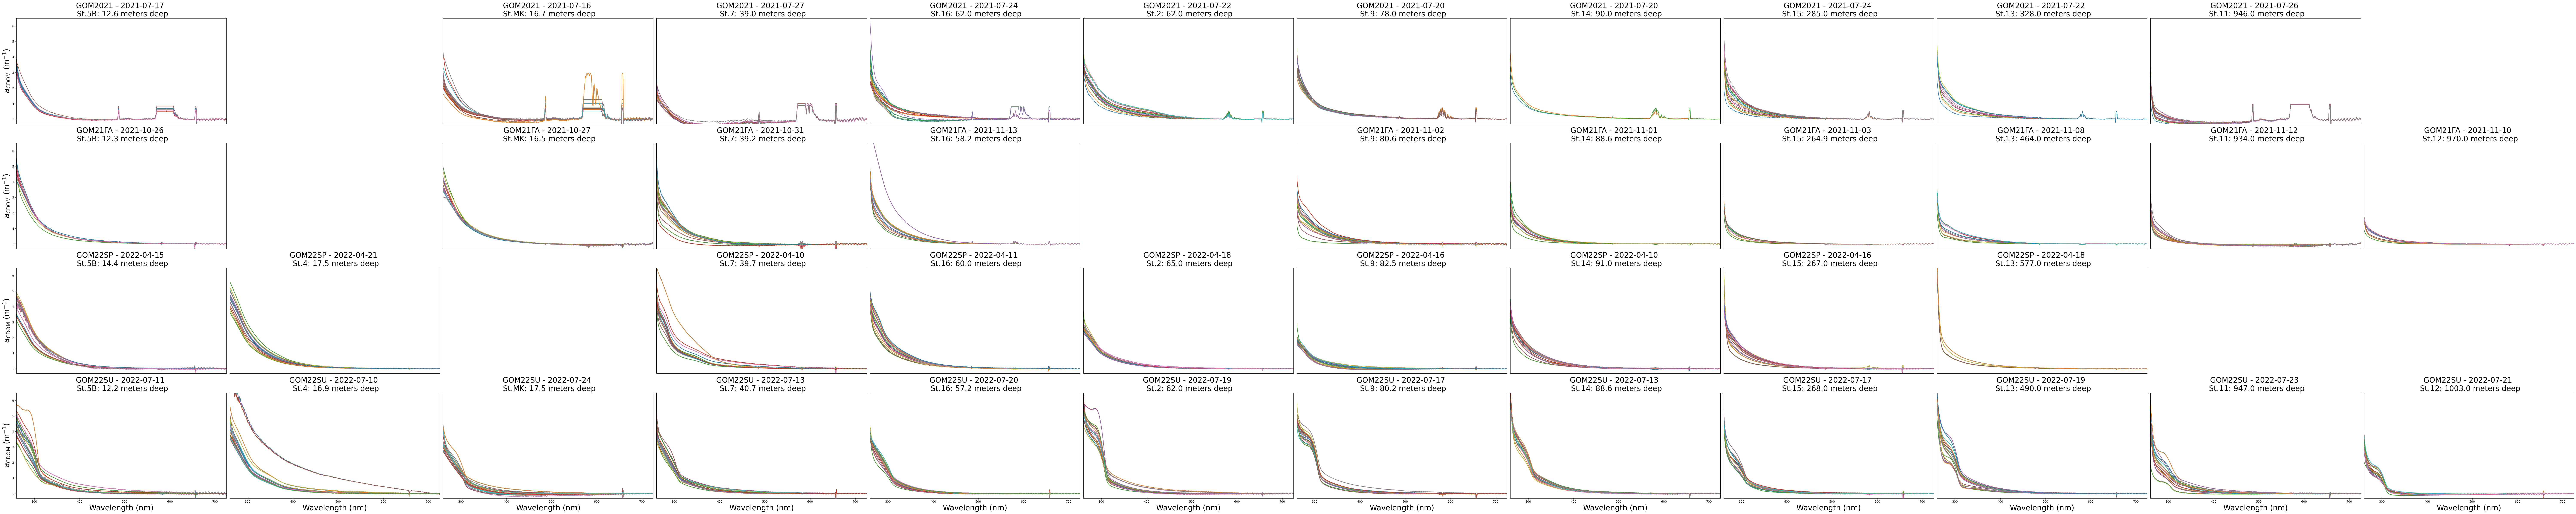

In [5]:
fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*10, len(trips)*6))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        subset_df = df_cdom[(df_cdom['Trip'] == trip) & (df_cdom['Station'] == station)]
        
        plotted = False  # Flag to check if something has been plotted

        # If any data exists for this combination
        if not subset_df.empty:
            for idx, row in subset_df.iterrows():
                cdom_abs = row[:501]  # Limit to the first 501 values
                cdom_abs = np.asarray(cdom_abs, dtype=float).ravel()
                wavelengths = np.asarray(wavelengths, dtype=float).ravel()
                date = row["Date"] 
                # Plot all rows in subset_df against wavelengths
                axes[i, j].plot(wavelengths, cdom_abs)  # use cdom_abs.values[0] to get the values of the row
                plotted = True
            axes[i,j].set_ylim(-.3,6.5)
            axes[i,j].set_xlim(260,725)
            water_depth = df_meta[(df_meta['Trip'] == trip) & (df_meta['Station'] == station)]
            water_depth = water_depth['Water_depth'].mean()
            water_depth = round(water_depth, 1)
            axes[i, j].set_title(f'{trip} - {date} \n {station}: {water_depth} meters deep', size =25)
        else: 
            axes[i, j].axis('off')  # Turn off the axis if no data for that combination

            
        if j == 0:
            axes[i,j].set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)', size=25, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=10)
        else: 
            axes[i,j].set_ylabel('')
            axes[i,j].yaxis.set_ticklabels([])
            axes[i,j].set_yticks([])
        
        if i == 3:
            axes[i,j].set_xlabel('Wavelength (nm)', size=25, c='black')
            axes[i,j].xaxis.set_tick_params(labelsize=10)
        else: 
            axes[i,j].set_xlabel('')
            axes[i,j].xaxis.set_ticklabels([])
            axes[i,j].set_xticks([])

plt.tight_layout()
fig.set_facecolor('w')
plt.show()


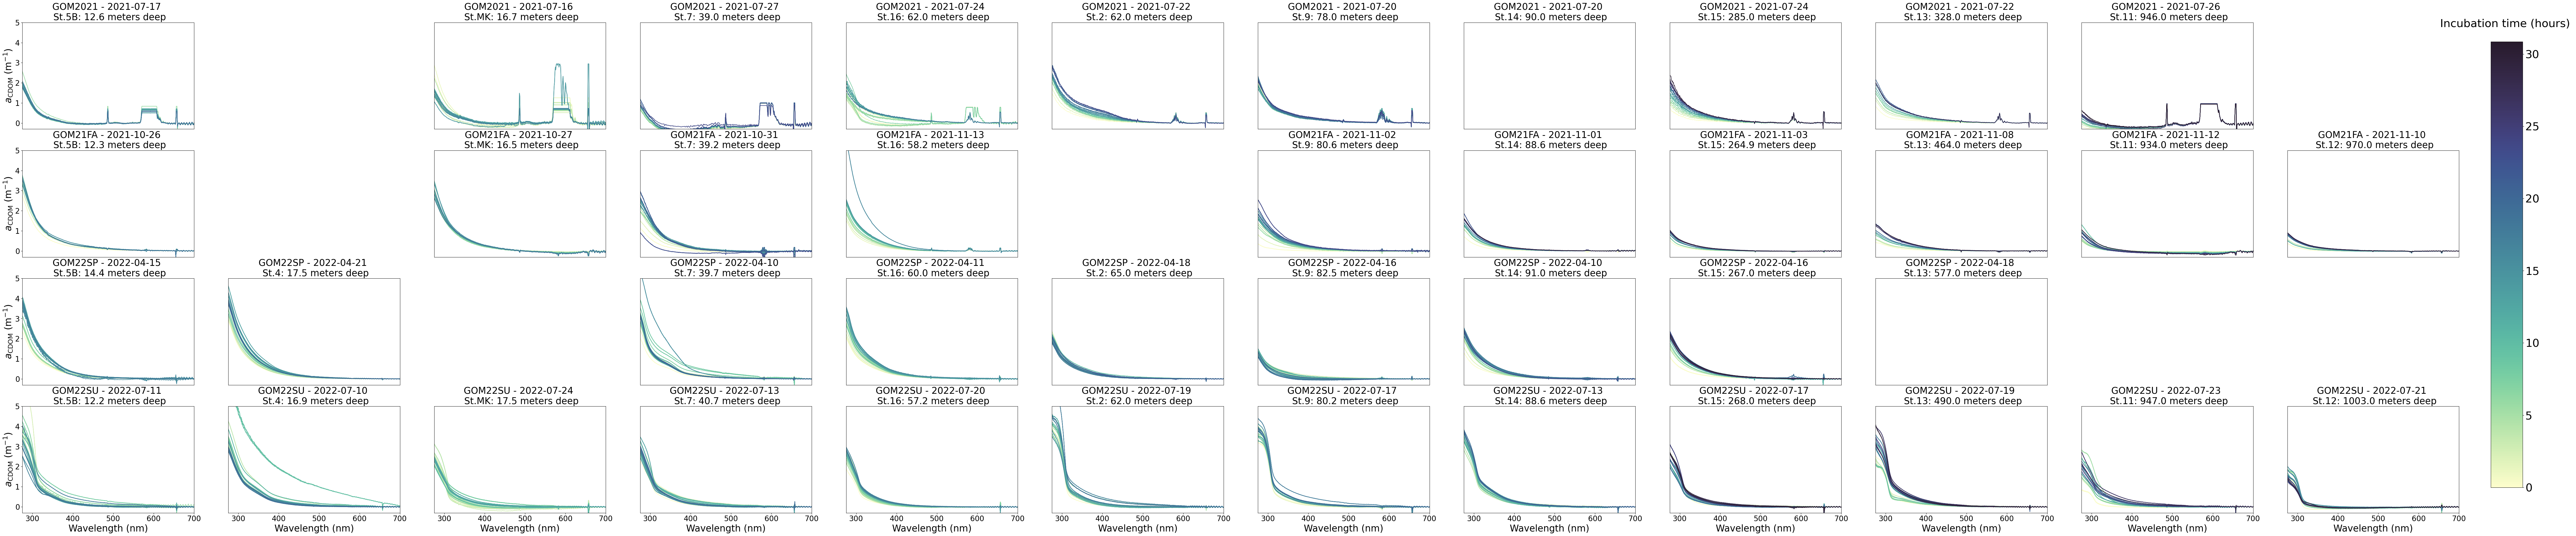

In [6]:
#Setup colormap and normalization:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*10, len(trips)*6))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        subset_df = df_cdom[(df_cdom['Trip'] == trip) & (df_cdom['Station'] == station)]
        plotted = False

        if not subset_df.empty:
            for idx, row in subset_df.iterrows():
                #get the data
                cdom_abs = row[:501]
                cdom_abs = np.asarray(cdom_abs, dtype=float).ravel()
                
                #get the date
                date = row["Date"]

                #color and plot:
                cmap=cmo.deep
                norm = plt.Normalize(vmin=0, vmax=df_cdom['BC_time'].max())
                color = cmap(norm(row["BC_time"]))
                axes[i, j].plot(wavelengths, cdom_abs, color=color)
                
                plotted = True
            
            #set axis and lables 
            axes[i,j].set_ylim(-.3,5)
            axes[i,j].set_xlim(275,700)
            water_depth = df_meta[(df_meta['Trip'] == trip) & (df_meta['Station'] == station)]
            water_depth = water_depth['Water_depth'].mean()
            water_depth = round(water_depth, 1)
            axes[i, j].set_title(f'{trip} - {date} \n {station}: {water_depth} meters deep', size=25)
        else: 
            axes[i, j].axis('off')

        #set y labes 
        if j == 0:
            axes[i,j].set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)', size=25, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=20)
        else: 
            axes[i,j].set_ylabel('')
            axes[i,j].yaxis.set_ticklabels([])
            axes[i,j].set_yticks([])
        
        #set x labes 
        if i == 3:
            axes[i,j].set_xlabel('Wavelength (nm)', size=25, c='black')
            axes[i,j].xaxis.set_tick_params(labelsize=20)
        else: 
            axes[i,j].set_xlabel('')
            axes[i,j].xaxis.set_ticklabels([])
            axes[i,j].set_xticks([])

#Add colorbar:
fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.deep, norm=plt.Normalize(vmin=0, vmax=df_cdom['BC_time'].max())), cax=cbar_ax)
cbar.ax.set_title(f'Incubation time (hours) \n', fontsize = 30)
cbar.ax.tick_params(labelsize=30)

#disply and save 
#plt.tight_layout()
fig.set_facecolor('w')

plt.savefig("../Dissertation_projects/Figures/Spectra_and_heat_maps/Benthic_chamber_spectra.png")

plt.show()

Text(0.5, 1.0, 'BC fe3')

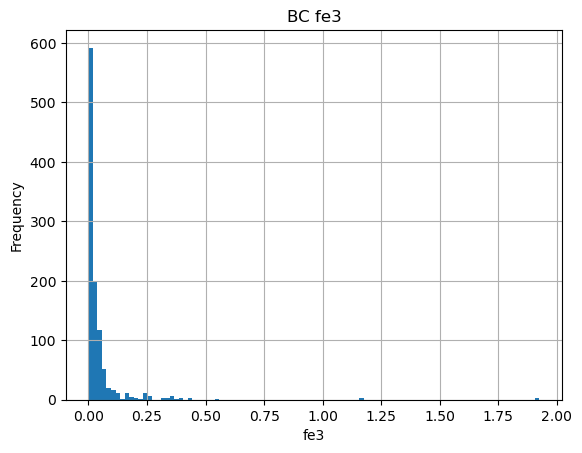

In [7]:
#add fe data 
df_iron = df_iron[df_iron.index.to_series().apply(lambda x: str(x).isnumeric())]
df_iron.index = df_iron.index.astype('int64')
df_cdom = df_cdom.join(df_iron)

#plot a histogram of the 'fe3' column
df_cdom['Fe3_uM'].hist(bins = 100)
plt.xlabel('fe3')
plt.ylabel('Frequency')
plt.title('BC fe3')

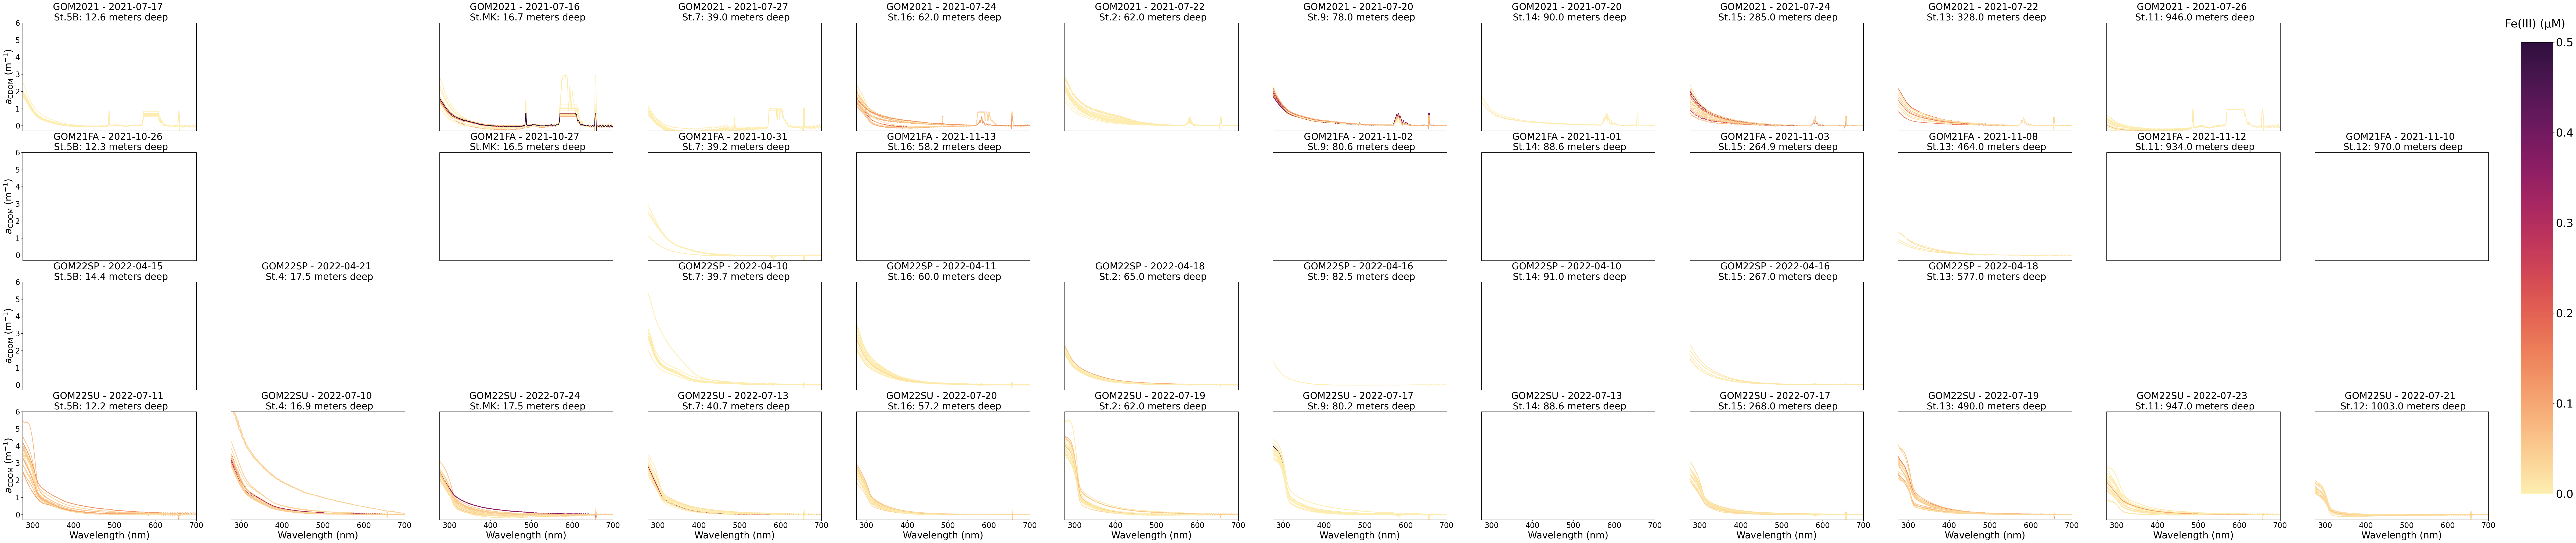

In [8]:
#Setup colormap and normalization:

fig, axes = plt.subplots(len(trips), len(stations), figsize=(len(stations)*10, len(trips)*6))

for i, trip in enumerate(trips):
    for j, station in enumerate(stations):
        # Filter by trip and station
        subset_df = df_cdom[(df_cdom['Trip'] == trip) & (df_cdom['Station'] == station)]
        plotted = False

        if not subset_df.empty:
            for idx, row in subset_df.iterrows():
                #get the data
                cdom_abs = row[:501]
                cdom_abs = np.asarray(cdom_abs, dtype=float).ravel()
                
                #get the date
                date = row["Date"]

                #color and plot:
                cmap=cmo.matter
                norm = plt.Normalize(vmin=0, vmax=.5)
                color = cmap(norm(row["Fe3_uM"]))
                axes[i, j].plot(wavelengths, cdom_abs, color=color)
                
                plotted = True
            
            #set axis and lables 
            axes[i,j].set_ylim(-.3,6)
            axes[i,j].set_xlim(275,700)
            water_depth = df_meta[(df_meta['Trip'] == trip) & (df_meta['Station'] == station)]
            water_depth = water_depth['Water_depth'].mean()
            water_depth = round(water_depth, 1)
            axes[i, j].set_title(f'{trip} - {date} \n {station}: {water_depth} meters deep', size=25)
        else: 
            axes[i, j].axis('off')

        #set y labes 
        if j == 0:
            axes[i,j].set_ylabel(r'$a_{\mathrm{CDOM}}$ (m$^{-1}$)', size=25, c='black')
            axes[i,j].yaxis.set_tick_params(labelsize=20)
        else: 
            axes[i,j].set_ylabel('')
            axes[i,j].yaxis.set_ticklabels([])
            axes[i,j].set_yticks([])
        
        #set x labes 
        if i == 3:
            axes[i,j].set_xlabel('Wavelength (nm)', size=25, c='black')
            axes[i,j].xaxis.set_tick_params(labelsize=20)
        else: 
            axes[i,j].set_xlabel('')
            axes[i,j].xaxis.set_ticklabels([])
            axes[i,j].set_xticks([])

#Add colorbar:
fig.subplots_adjust(right=0.89)
cbar_ax = fig.add_axes([.9, 0.15, 0.01, 0.7])
cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmo.matter, norm=plt.Normalize(vmin=0, vmax=.5)), cax=cbar_ax)
cbar.ax.set_title(f'Fe(III) (\u03BCM) \n', fontsize = 30)
cbar.ax.tick_params(labelsize=30)

#disply and save 
#plt.tight_layout()
fig.set_facecolor('w')

plt.show()